In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### virtual env

In [ ]:
!which python

### Preprocessing

In [2]:
data_folder = Path("./example_data/1738726494-66512/")

In [ ]:
data = {}
# csv文件的名字作为gesture data label
for gesture_file in data_folder.glob("*.csv"):
    gesture_name = gesture_file.stem    
    data[gesture_name] = pd.read_csv(gesture_file)  

In [4]:
# gesture classes
data.keys()

dict_keys(['b', 'l', 'o', 'r', 'u'])

In [ ]:
data["u"]
#  acc: linear acceleration of the device in 3D space
# gyro: angular velocity of the device in 3D space

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,timestamp
0,-0.014875,-0.000750,0.123375,0.000183,-0.000137,-0.000229,1.738727e+09
1,-0.014750,-0.000625,0.124000,0.000168,-0.000061,-0.000229,1.738727e+09
2,-0.014500,-0.001250,0.123875,0.000046,0.000244,-0.000534,1.738727e+09
3,-0.014125,-0.004250,0.121000,0.000152,0.000320,-0.000702,1.738727e+09
4,-0.014125,-0.005250,0.120000,0.000168,0.000107,-0.000519,1.738727e+09
...,...,...,...,...,...,...,...
477,-0.001500,-0.037000,0.136750,0.002625,-0.001648,-0.002792,1.738727e+09
478,-0.000625,-0.042375,0.134375,0.001907,-0.001022,-0.002579,1.738727e+09
479,-0.000000,-0.042000,0.131000,0.002030,0.000580,-0.001816,1.738727e+09
480,0.001375,-0.044375,0.123500,0.001587,0.000931,-0.001541,1.738727e+09


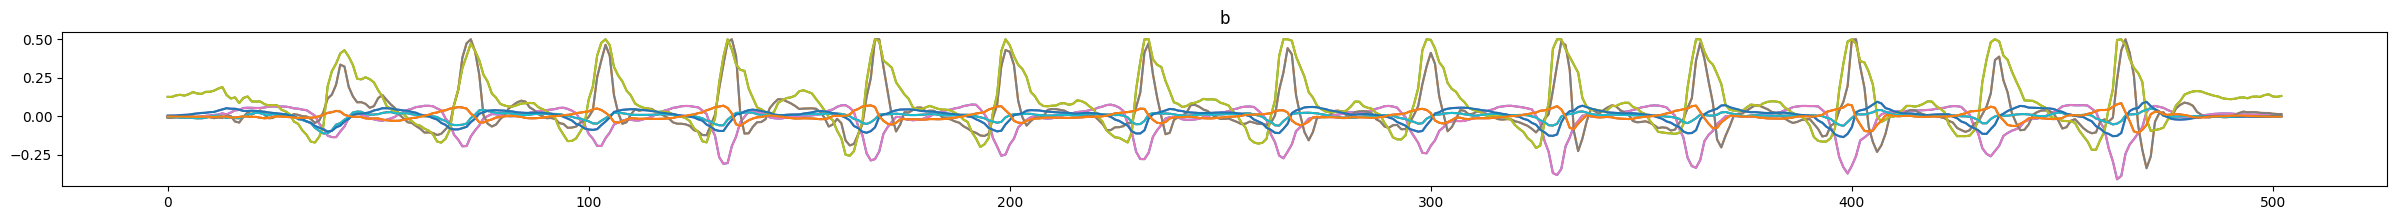

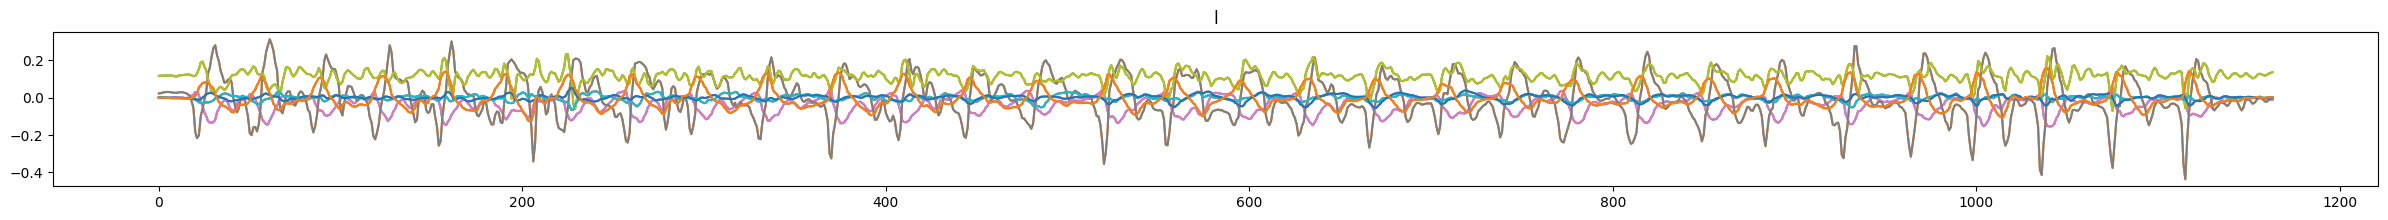

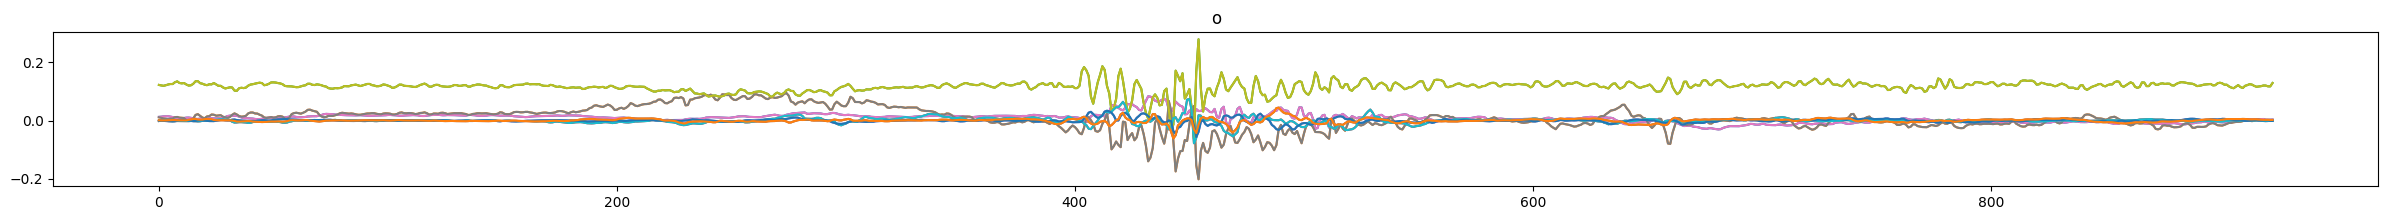

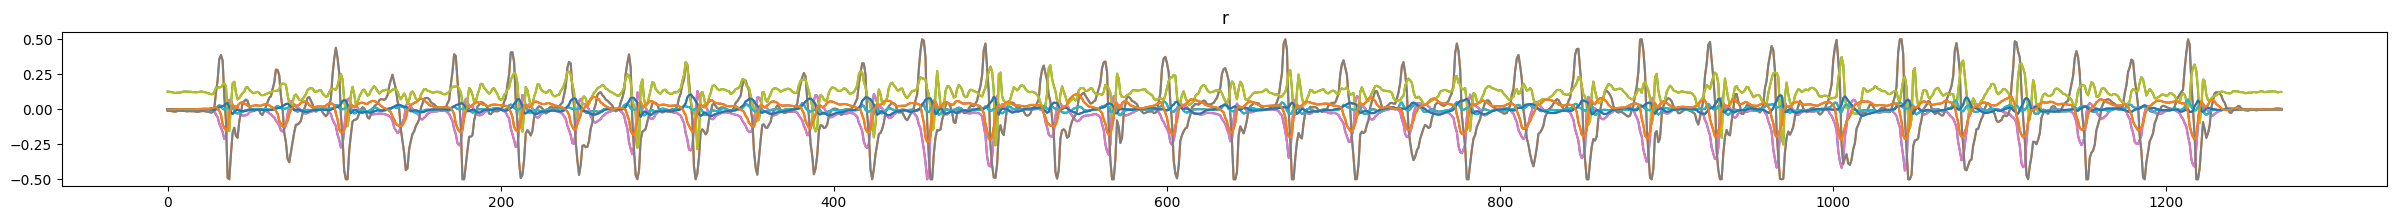

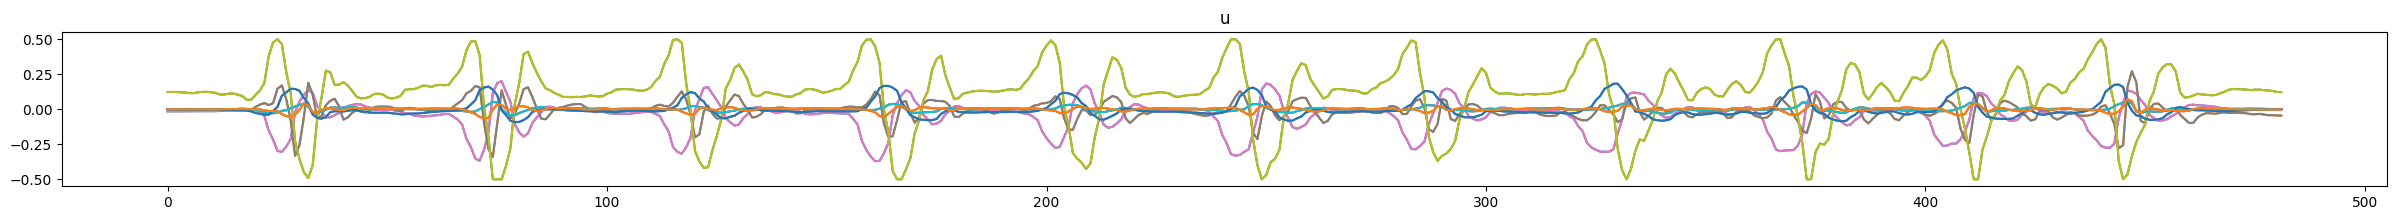

In [ ]:
for gesture_name, df in data.items():
    plt.figure(figsize=(30, 2)) # Creates a new figure with specific dimensions (30 units wide, 2 units tall)
    plt.title(gesture_name)
    plt.plot(df.values[:, :-1])# Plots all columns of the DataFrame except the last one (likely excluding 'timestamp')
    plt.show()

In [8]:
# create windows of data, window size 50, overlap 49
window_size = 50
# window_size = 10
X = []
y = []
for gesture_name, df in data.items():
    df_values = df.values[:, :-1]
    label = gesture_name
    for i in range(0, len(df) - window_size, 1):
        X.append(df_values[i:i+window_size].flatten())
        y.append(label)
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)


(4093, 300) (4093,)


### Training

In [9]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)

(3274, 300) (819, 300) (3274,) (819,)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

### Evaluation

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

1.0
[[114   0   0   0   0]
 [  0 222   0   0   0]
 [  0   0 184   0   0]
 [  0   0   0 213   0]
 [  0   0   0   0  86]]


### Saving

In [13]:
# save the model
import pickle
import time

# make the model name based on the gesture names
run_timestamp = str(time.time()).replace(".", "-")
model_name = '_'.join(sorted(data.keys())) + "__" + run_timestamp

# make a model directory
model_dir = Path('./models')
model_dir.mkdir(parents=True, exist_ok=True)
with open(model_dir / f'rf_{model_name}.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [14]:
print(model_name)

b_l_o_r_u__1740674035-9790394
